In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from features import HTMLFeatures, URLFeatures, TextFeatures

# **PHISHING DATASET ANALYSIS**

* * *

In [2]:
# importing datasets
texts = pd.read_csv('DATASETS/PRE/TEXTS.csv')
urls = pd.read_csv('DATASETS/PRE/URLS.csv')
webs = pd.read_csv('DATASETS/PRE/WEBS.csv')

### Classes Distribution

<Axes: ylabel='label'>

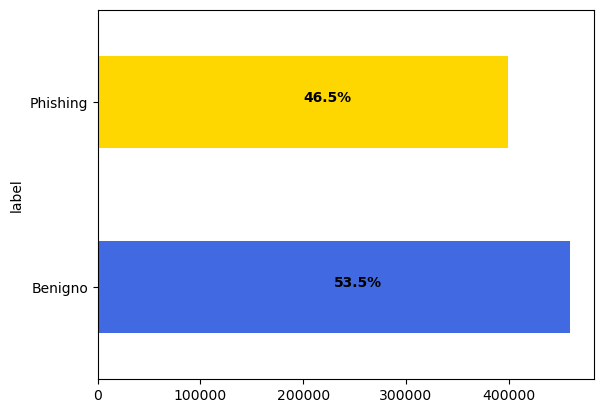

In [3]:
dist = pd.concat([texts['label'], urls['label'], webs['label']]).value_counts()
dist.index = dist.index.map({0: 'Benigno', 1: 'Phishing'})
plt.text(230010, 0, '53.5%', color='black', fontweight='bold')
plt.text(200000, 1, '46.5%', color='black', fontweight='bold')
dist.plot.barh(color=['royalblue', 'gold'])

## **URL Analysis**

A URL has lexical characteristics, which refer to the textual properties of the URL. According to some investigations, some URL features related to phishing attacks are:

- Presence of suffix or prefix "-" in the domain
- Points number
- Presence of the IP direction in the domain
- Presence of keywords such as 'login', 'server', and 'admin'
- Subdirectories number
- Host Length
- etc

In [4]:
# extract url relevant features
urls = pd.DataFrame([URLFeatures(row.text).get_features()|{'label': row.label} for row in urls.itertuples(index=False)])
urls = urls.astype(int)

In [5]:
# calculate averages of each feature by class
urls_features = pd.concat([
    urls.loc[urls['label'] == 0].mean(axis=0),
    urls.loc[urls['label'] == 1].mean(axis=0)
], axis=1).rename(columns={0: 'Benigno', 1:'Phishing'})[:-1]

In [6]:
# calculate proportions in bool url features
url_proportions = urls_features.copy()[:11] * 100
url_proportions['Diff'] = url_proportions['Phishing'] - url_proportions['Benigno']
url_proportions

,Benigno,Phishing,Diff
use_shortening_service,7.072162,5.166026,-1.906136
prefix_suffix_presence,0.626812,11.062183,10.435370
has_double_slash,0.018980,0.631297,0.612316
has_haveat_sign,0.056713,1.186786,1.130074
has_port,0.017151,0.026390,0.009239
has_admin_keyword,0.101534,1.906051,1.804517
has_server_keyword,0.216560,0.485892,0.269331
has_login_keyword,0.192320,9.076185,8.883865
has_client_keyword,0.102677,0.527547,0.424869
host_is_ip,0.000229,0.561181,0.560953


In [7]:
# calculate averages in numeric url features
url_averages = urls_features.copy()[11:]
url_averages['Diff'] = url_averages['Phishing'] - url_averages['Benigno']
url_averages['Factor'] = url_averages['Phishing'] / url_averages['Benigno']
url_averages

,Benigno,Phishing,Diff,Factor
length,47.004192,47.575145,0.570953,1.012147
path_length,41.423458,25.190401,-16.233058,0.608119
host_length,1.815871,9.813579,7.997707,5.404336
entropy,3.641731,3.502396,-0.139336,0.961739
digits_num,3.065922,5.017011,1.951090,1.636380
subdirectories_num,3.320061,2.533673,-0.786387,0.763141
periods_num,1.825842,2.467589,0.641747,1.351480
params_num,0.183683,0.259251,0.075568,1.411405


## **HTML ANALYSIS**

From websites we can also extract characteristics concerning to phishing. These features capture the structure of the web page and the content included in it, such as:

- Number of internal & external links
- Number of functions that modify the DOM
- Number of scripts
- Number of tags
- Number of suspicious scripts functions
- etc

In [8]:
# extract html relevant features
webs = pd.DataFrame([HTMLFeatures(row.text).get_features()|{'label': row.label} for row in webs.itertuples(index=False)])
webs = webs.astype(int)

In [9]:
# calculate averages of each feature by class
webs_features = pd.concat([
    webs.loc[webs['label'] == 0].mean(axis=0),
    webs.loc[webs['label'] == 1].mean(axis=0)
], axis=1).rename(columns={0: 'Benigno', 1:'Phishing'})[:-1]

# Calculate differences between phishing and benign features 
webs_features['Diff'] = webs_features['Phishing'] - webs_features['Benigno']
webs_features['Factor'] = webs_features['Phishing'] / webs_features['Benigno']

webs_features

,Benigno,Phishing,Diff,Factor
suspicious_func_num,0.312549,0.274035,-0.038514,0.876775
page_entropy,4.478566,4.316642,-0.161923,0.963845
script_tags_num,15.126072,6.244720,-8.881352,0.412845
html_length,14183.575799,7956.913693,-6226.662106,0.560995
tokens_num,1157.061185,550.026038,-607.035147,0.475365
sentences_num,236.187744,159.838128,-76.349615,0.676742
punctuation_num,2224.979345,1394.538602,-830.440744,0.626765
capitalization_num,1352.086321,976.650947,-375.435374,0.722329
avg_sentence_tokens_num,8.169817,9.974873,1.805056,1.220942
html_tags_num,361.285269,129.689913,-231.595356,0.358968


## **TEXT ANALYSIS**

Before preprocessing the text, we will perform a basic analysis of the texts, considering such things as length, entropy, number of words, etc.

In [4]:
texts = pd.DataFrame(
    [{'text': row.text}|TextFeatures(row.text).get_features()|{'label': row.label} 
     for row in texts.itertuples(index=False)]
)

In [5]:
# calculate averages of each feature by class
texts_features = pd.concat([
    texts.iloc[:, 1:].astype(int).loc[texts['label'] == 0].mean(axis=0),
    texts.iloc[:, 1:].astype(int).loc[texts['label'] == 1].mean(axis=0)
], axis=1).rename(columns={0: 'Benigno', 1:'Phishing'})[:-1]

# Calculate differences between phishing and benign features in percentage
texts_features['Diff'] = texts_features['Phishing'] - texts_features['Benigno']

texts_features

,Benigno,Phishing,Diff
has_email,0.159727,0.077033,-0.082694
has_url,0.285760,0.141945,-0.143815
length,3141.967188,1471.028936,-1670.938252
entropy,3.913839,3.946038,0.032199
words_num,623.505576,282.357143,-341.148433
digits_num,69.788849,35.058785,-34.730064


### TF-IDF Analysis

TF-IDF Vectorizer is a very common algorithm to transform text into a meaningful representation of numbers, which can be used for our text analysis. 

In [6]:
# vectorize texts
tfidf_vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.25, stop_words='english', max_features=10000)
texts_tfidfs = tfidf_vect.fit_transform(texts['text'])

**TF-IDF (term frequency-inverse document frequency)** is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents. The higher is the value, the more relevant the term is in that document. Hence, we'll check TF-IDF averages scores of all features extracted from TF-IDF Vectorizer and sort them in descending order, so we can know which are the most relevant words over all phishing and benign texts.

In [7]:
# Get TF-IDF scores from all features
tfidfs = pd.DataFrame.sparse.from_spmatrix(texts_tfidfs, columns=tfidf_vect.get_feature_names_out())
tfidfs['label'] = texts['label']

In [8]:
# Calculate TF-IDF Averages in benign samples and sort them in descending order
top_relevant_benign_words = tfidfs.loc[tfidfs['label'] == 0].drop('label', axis=1).mean(axis=0).sort_values(ascending=False)[:10]
top_relevant_benign_words

enron       0.027281
ect         0.021609
linux       0.018734
www         0.015536
list        0.014974
http www    0.014301
2002        0.013505
know        0.012886
language    0.012263
thanks      0.011919
dtype: Sparse[float64, 0]

In [9]:
top_relevant_phishing_words = tfidfs.loc[tfidfs['label'] == 1].drop('label', axis=1).mean(axis=0).sort_values(ascending=False)[:10]
top_relevant_phishing_words

free       0.026833
click      0.023108
email      0.020099
www        0.016920
money      0.015797
000        0.015061
new        0.015012
online     0.014321
just       0.013659
company    0.013308
dtype: Sparse[float64, 0]

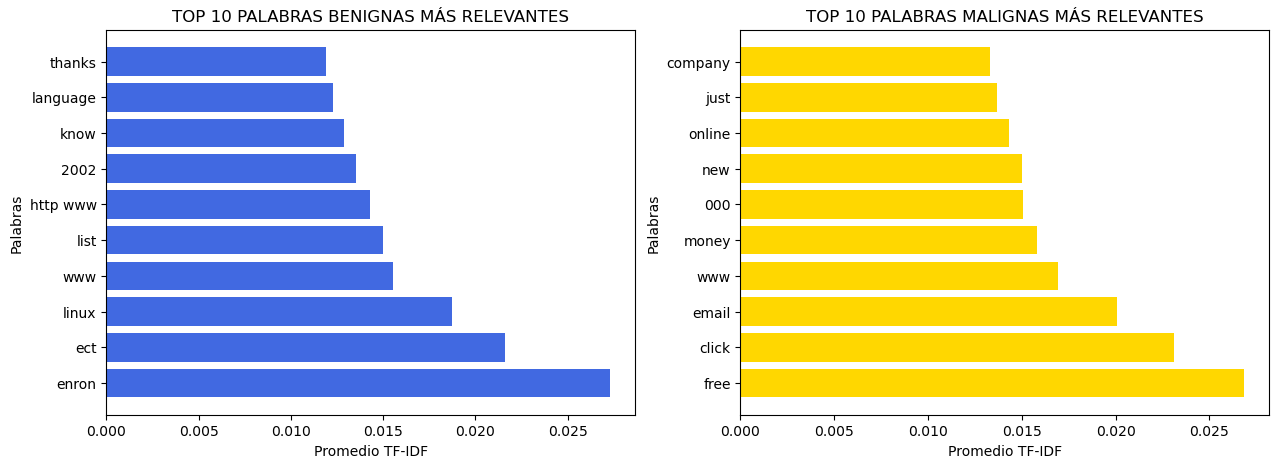

In [10]:
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 2, 1) 
plt.barh(top_relevant_benign_words.index, top_relevant_benign_words.values, color='royalblue')
plt.xlabel("Promedio TF-IDF")
plt.ylabel("Palabras")
plt.title('TOP 10 PALABRAS BENIGNAS MÁS RELEVANTES')

plt.subplot(1, 2, 2)
plt.barh(top_relevant_phishing_words.index, top_relevant_phishing_words.values, color='gold')
plt.xlabel("Promedio TF-IDF")
plt.ylabel("Palabras")
plt.title('TOP 10 PALABRAS MALIGNAS MÁS RELEVANTES')

plt.show()

### Term Frequency Analysis

Once we have detected the most relevant words, we will focus on the terms frequencies. We will use `CountVectorizer`, a tool that converts a collection of text documents into a matrix of token counts often used to measure the term frequency of words in a corpus. Term frequency is simply the number of times a word appears in a document. With this tool we'll be able to get the most common words in all texts, and contrast this information against the previous graphs.

In [11]:
cv = CountVectorizer(ngram_range=(1, 2), max_df=0.25, stop_words='english', max_features=10000)
texts_tf = cv.fit_transform(texts['text'])

In [15]:
# Get TF-IDF scores from all features
tfs = pd.DataFrame.sparse.from_spmatrix(texts_tf, columns=cv.get_feature_names_out())
tfs['label'] = texts['label']

In [17]:
# Calculate TF in benign samples and get the 10 most frequent
top_frequent_benign_words = tfs.loc[tfs['label'] == 0].drop('label', axis=1).sum(axis=0).nlargest(10)
top_frequent_benign_words

enron          17840
language       17216
university     17165
subject        11020
ect            10899
00             10772
information    10772
www            10483
mail           10253
new            10194
dtype: Sparse[int64, 0]

In [18]:
# Calculate TF in phishing samples and get the 10 most frequent
top_frequent_phishing_words = tfs.loc[tfs['label'] == 1].drop('label', axis=1).sum(axis=0).nlargest(10)
top_frequent_phishing_words

½ï             6610
½ï ½ï          5332
email          5047
free           4522
000            4061
mail           3770
money          3762
company        3711
information    3693
business       3427
dtype: Sparse[int64, 0]

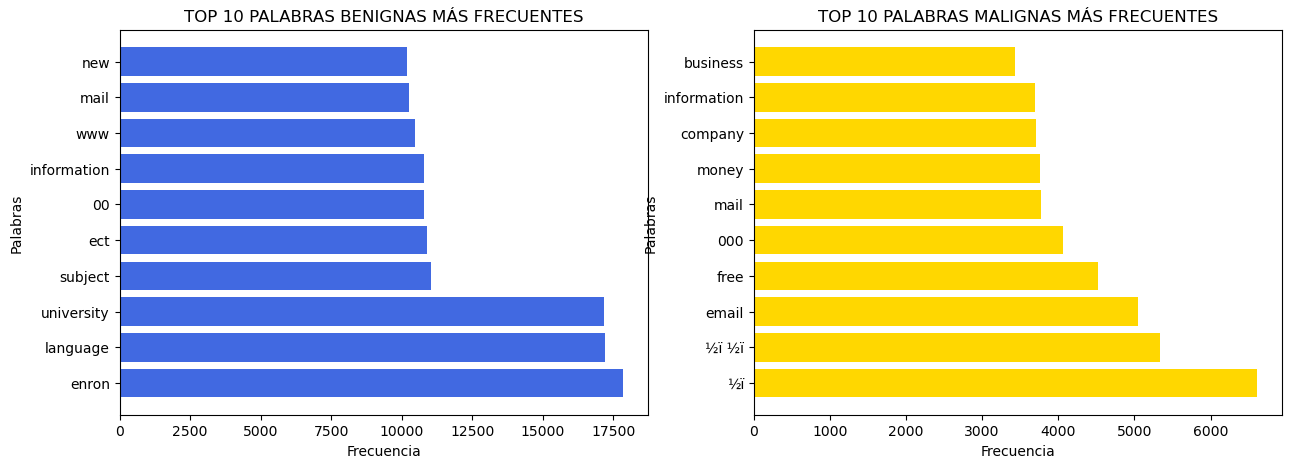

In [19]:
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 2, 1) 
plt.barh(top_frequent_benign_words.index, top_frequent_benign_words.values, color='royalblue')
plt.xlabel("Frecuencia")
plt.ylabel("Palabras")
plt.title('TOP 10 PALABRAS BENIGNAS MÁS FRECUENTES')

plt.subplot(1, 2, 2)
plt.barh(top_frequent_phishing_words.index, top_frequent_phishing_words.values, color='gold')
plt.xlabel("Frecuencia")
plt.ylabel("Palabras")
plt.title('TOP 10 PALABRAS MALIGNAS MÁS FRECUENTES')

plt.show()